In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

In [22]:
with open("../../data/hizandis_params.pkl", "rb") as f:
    data = pickle.load(f)

data.head()

,alpha,beta,metastability,chimera
0,1.519,0.189,9.907285e-03,0.060142
1,0.871,0.358,5.101621e-03,0.038007
2,0.932,0.000,3.114211e-03,0.192344
3,0.608,0.147,1.767520e-07,0.000001
4,0.668,0.168,3.477637e-07,0.000003


In [23]:
data["type"] = 1
data.loc[data["chimera"] >= 0.05, "type"] += 1

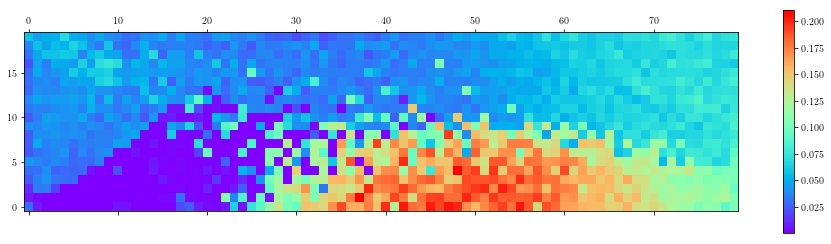

In [29]:
c = data.pivot_table(values="chimera", index="beta", columns="alpha")

plt.matshow(c.values, origin="lower")
plt.colorbar()

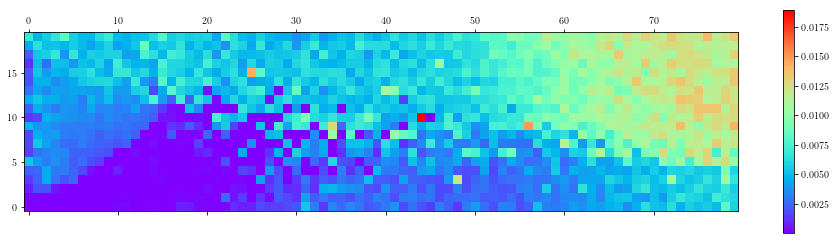

In [30]:
m = data.pivot_table(values="metastability", index="beta", columns="alpha")

plt.matshow(m.values, origin="lower")
plt.colorbar()

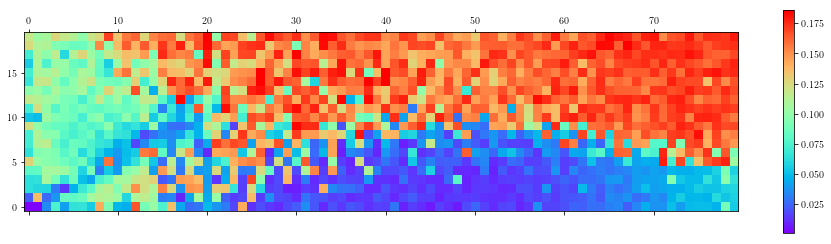

In [32]:
plt.matshow((m/c).values, origin="lower")
plt.colorbar()

In [48]:
data.loc[(data["alpha"] >= 1.55) & (data["beta"] >= 0.3)]

,alpha,beta,metastability,chimera,type
107,1.600,0.316,0.013497,0.076582,2
273,1.559,0.379,0.011333,0.066121,2
393,1.559,0.337,0.010782,0.065298,2
415,1.559,0.358,0.010946,0.067380,2
527,1.559,0.316,0.012300,0.067958,2
706,1.580,0.358,0.011373,0.069943,2
745,1.580,0.337,0.011132,0.064444,2
913,1.600,0.379,0.011623,0.066580,2
991,1.580,0.379,0.011571,0.066832,2
1073,1.580,0.316,0.012450,0.071549,2


In [9]:
data.describe()

,alpha,beta,metastability,chimera
count,1600.000000,1600.000000,1.600000e+03,1.600000e+03
mean,0.800000,0.200000,5.334249e-03,6.866250e-02
std,0.467772,0.121564,3.639100e-03,5.281415e-02
min,0.000000,0.000000,1.299914e-07,9.995565e-07
25%,0.400000,0.099750,2.737470e-03,3.506745e-02
50%,0.800000,0.200000,5.092865e-03,5.253514e-02
75%,1.200000,0.300250,7.284891e-03,1.002281e-01
max,1.600000,0.400000,1.889296e-02,2.104647e-01
